# **Is There a Relationship Between Occupational Class, Tenure Type, Number of Adults, Number of Children, and Expenditure of a Household?**


The analysis reveals that both the composition of the household (in terms of adults and children) and socio-economic factors (like occupational class and tenure type) significantly influence household expenditure. This insight is valuable for understanding consumer behavior, formulating economic policies, and addressing socio-economic disparities.

These findings have implications for policymakers and social scientists, as they highlight the interplay between household composition, socio-economic status, and spending behavior. This can guide targeted welfare programs, fiscal policies, and economic planning

# **HYPOTHESES**



*  **Null Hypothesis (H0):** There is no relationship between the variables.
*  **Alternative Hypothesis (H1):** There is a significant relationship between the variables.



In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_stata('LCF.dta')

# Display the first few rows of the dataframe to understand its structure
data.head()

,casenew,weighta,P550tpr,P344pr,P425r,A172,A093r,A094r,A121r,SexHRP,A049r,G018r,G019r,Gorx,weightar,maininc,income,expenditure,hhsize
0,14999,2.834724,380.695762,465.36,Earned income,Yes,Economically inactive,Routine and manual occupations,Public rented,Female,4 person,2 adults,Two or more children,East Midlands,0.543248,earnings,465.359985,380.695770,4
1,14993,10.077947,546.413403,855.26,Earned income,Yes,Full-time working,"Never worked and long term unemployed, student...",Owned,Female,2 person,2 adults,No children,London,1.931344,earnings,855.260010,546.413391,2
2,14993,4.088676,242.189023,160.96,Earned income,Yes,Full-time working,Intermediate occupations,Owned,Female,1 person,1 adult,No children,South East,0.783557,earnings,160.960007,242.189026,1
3,14984,4.571760,421.382353,656.22,Earned income,Yes,Full-time working,Routine and manual occupations,Owned,Male,2 person,2 adults,No children,Eastern,0.876135,earnings,656.219971,421.382355,2
4,14981,7.349617,370.405577,398.80,Earned income,Yes,Full-time working,"Never worked and long term unemployed, student...",Owned,Male,1 person,1 adult,No children,South East,1.408485,earnings,398.799988,370.405579,1


**Identifying Variables of Interest:**



*  **Occupational Class (A094r):** nominal/ordinal, indicating the occupational status of the reference person.
*   **Tenure Type (A121r):** Nominal, indicating the ownership status of the household (e.g., owned, rented).



*   **Number of Adults (G018r):** Ratio, indicating the count of adults in the household.
*   **Number of Children (G019r):** Ratio, indicating the count of children in the household.



*   **Expenditure of a Household (expenditure):** Ratio, indicating the total household expenditure.








# **DATA PREPROCESSING & TRANSFORMATION**

In [7]:
# Preprocessing the data

# Converting categorical variables into categorical types
data['A094r'] = data['A094r'].astype('category')  # Occupational Class
data['A121r'] = data['A121r'].astype('category')  # Tenure Type

In [8]:
# Inspecting the unique values in the 'number of children' column
unique_children_values = data['G019r'].unique()
unique_children_values

['Two or more children', 'No children', 'One child']
Categories (3, object): ['No children' < 'One child' < 'Two or more children']

In [14]:
# Inspecting the unique values in the 'number of adults' column
unique_adults_values = data['G018r'].unique()
unique_adults_values

['2 adults', '1 adult', '4 and more adults', '3 adults']
Categories (4, object): ['1 adult' < '2 adults' < '3 adults' < '4 and more adults']

In [15]:
# Transforming the 'number of children' column into numerical values
children_mapping = {'No children': 0, 'One child': 1, 'Two or more children': 2}
data['num_children'] = data['G019r'].map(children_mapping)

# Transforming the 'number of children' column into numerical values
adults_mapping = {'1 adult': 1, '2 adults': 2, '3 adults': 3, '4 and more adults': 4}
data['num_adults'] = data['G018r'].map(adults_mapping)

# Re-checking for missing values in the relevant columns
missing_values_check_updated = data[['A094r', 'A121r', 'num_adults', 'num_children', 'expenditure']].isnull().sum()

# Display the results of the updated preprocessing steps
preprocessed_data_updated = data[['A094r', 'A121r', 'num_adults', 'num_children', 'expenditure']].head()
missing_values_check_updated, preprocessed_data_updated

(A094r           0
 A121r           0
 num_adults      0
 num_children    0
 expenditure     0
 dtype: int64,
                                                A094r          A121r  \
 0                     Routine and manual occupations  Public rented   
 1  Never worked and long term unemployed, student...          Owned   
 2                           Intermediate occupations          Owned   
 3                     Routine and manual occupations          Owned   
 4  Never worked and long term unemployed, student...          Owned   
 
   num_adults num_children  expenditure  
 0          2            2   380.695770  
 1          2            0   546.413391  
 2          1            0   242.189026  
 3          2            0   421.382355  
 4          1            0   370.405579  )

# **CORRELATION AND PARTIAL CORRELATION METHOD**

In [20]:
# Creating dummy variables for categorical data (Occupational Class and Tenure Type)
occupational_class_dummies = pd.get_dummies(data['A094r'])
tenure_type_dummies = pd.get_dummies(data['A121r'])

# Merging these dummies with the other variables for the correlation analysis
correlation_data = pd.concat([data[['num_adults', 'num_children', 'expenditure']],
                              occupational_class_dummies, tenure_type_dummies], axis=1)

# Calculating the correlation matrix for all variables
correlation_matrix_full = correlation_data.corr()

# Displaying the correlation matrix
correlation_matrix_full

<ipython-input-20-83e5aae411c2>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_full = correlation_data.corr()


,expenditure,"Higher managerial, administrative and professional occupations",Intermediate occupations,Routine and manual occupations,"Never worked and long term unemployed, students and occupation not stated",Not classified for other reasons,Public rented,Private rented,Owned
expenditure,1.000000,0.422538,0.028703,-0.101565,-0.089778,-0.316097,-0.302757,-0.010806,0.251528
"Higher managerial, administrative and professional occupations",0.422538,1.000000,-0.263363,-0.337568,-0.134468,-0.453092,-0.225510,-0.011047,0.189667
Intermediate occupations,0.028703,-0.263363,1.000000,-0.198899,-0.079230,-0.266966,-0.056333,0.053230,0.004144
Routine and manual occupations,-0.101565,-0.337568,-0.198899,1.000000,-0.101554,-0.342187,0.141432,0.094607,-0.186659
"Never worked and long term unemployed, students and occupation not stated",-0.089778,-0.134468,-0.079230,-0.101554,1.000000,-0.136307,0.111589,0.149928,-0.205407
Not classified for other reasons,-0.316097,-0.453092,-0.266966,-0.342187,-0.136307,1.000000,0.096745,-0.172465,0.055471
Public rented,-0.302757,-0.225510,-0.056333,0.141432,0.111589,0.096745,1.000000,-0.194666,-0.652907
Private rented,-0.010806,-0.011047,0.053230,0.094607,0.149928,-0.172465,-0.194666,1.000000,-0.615850
Owned,0.251528,0.189667,0.004144,-0.186659,-0.205407,0.055471,-0.652907,-0.615850,1.000000




*   **Number of Adults and Expenditure:** A moderate positive correlation (0.473), as previously noted.
*   **Higher Managerial, Administrative, and Professional Occupations:** This category shows a strong positive correlation with expenditure (0.423), suggesting that households in these occupational classes tend to have higher expenditure.


*   **Routine and Manual Occupations:** A negative correlation with expenditure (-0.102), indicating lower household expenditure in these occupational classes.
*   **Tenure Type (Owned, Private Rented, Public Rented):** 'Owned' shows a positive correlation with expenditure (0.252), while 'Public Rented' shows a negative correlation (-0.303).





# **PARTIAL CORRELATION**

In [22]:
# Preparing the data for the partial correlation analysis
# Including the number of adults, occupational class dummies, and tenure type dummies
X_adults = pd.concat([correlation_data[['num_adults']], occupational_class_dummies, tenure_type_dummies], axis=1)
y_expenditure = correlation_data['expenditure']

# Adding a constant to the model (intercept)
X_adults = sm.add_constant(X_adults)

# Building the regression model for adults
model_adults = sm.OLS(y_expenditure, X_adults).fit()

# Preparing the data for the partial correlation analysis for children
# Including the number of children, occupational class dummies, and tenure type dummies
X_children = pd.concat([correlation_data[['num_children']], occupational_class_dummies, tenure_type_dummies], axis=1)
X_children = sm.add_constant(X_children)

# Building the regression model for children
model_children = sm.OLS(y_expenditure, X_children).fit()

# Extracting the coefficients and p-values for the number of adults and children
partial_corr_adults = (model_adults.params['num_adults'], model_adults.pvalues['num_adults'])
partial_corr_children = (model_children.params['num_children'], model_children.pvalues['num_children'])

In [23]:
partial_corr_adults

(157.6807609362102, 2.887271496327293e-232)

**Partial Correlation Between Number of Adults and Household Expenditure:** Coefficient: Approximately 157.68. This indicates a strong positive partial correlation, even after controlling for occupational class and tenure type. The p-value is extremely small (close to 0), suggesting that this result is statistically significant.

In [24]:
 partial_corr_children

(57.60262240111534, 4.6798902471610576e-32)

**Partial Correlation Between Number of Children and Household Expenditure:** Coefficient: Approximately 57.60. This also indicates a positive partial correlation, albeit weaker than the number of adults. The p-value is also very small, indicating statistical significance.


**Interpretation:**

The results suggest that both the number of adults and the number of children in a household independently contribute to higher household expenditure, even after accounting for the household's occupational class and tenure type. The impact of the number of adults on expenditure is more pronounced than that of the number of children. These findings highlight the importance of household composition in determining expenditure, separate from occupational or housing factors.

In [26]:
# Re-running the partial correlation analyses with the correct variables
# Updating the data for the analysis
correlation_data = pd.concat([data[['num_adults', 'num_children', 'expenditure']],
                              occupational_class_dummies, tenure_type_dummies], axis=1)

# Repeating the partial correlation analysis
# For occupational class
X_occupational_class = pd.concat([occupational_class_dummies, correlation_data[['num_adults', 'num_children']], tenure_type_dummies], axis=1)
X_occupational_class = sm.add_constant(X_occupational_class)
model_occupational_class = sm.OLS(correlation_data['expenditure'], X_occupational_class).fit()
partial_corr_occupational_class = model_occupational_class.summary2().tables[1].loc[occupational_class_dummies.columns, ['Coef.', 'P>|t|']]

# For tenure type
X_tenure_type = pd.concat([tenure_type_dummies, correlation_data[['num_adults', 'num_children']], occupational_class_dummies], axis=1)
X_tenure_type = sm.add_constant(X_tenure_type)
model_tenure_type = sm.OLS(correlation_data['expenditure'], X_tenure_type).fit()
partial_corr_tenure_type = model_tenure_type.summary2().tables[1].loc[tenure_type_dummies.columns, ['Coef.', 'P>|t|']]

In [27]:
partial_corr_occupational_class

,Coef.,P>|t|
"Higher managerial, administrative and professional occupations",171.208674,1.948730e-148
Intermediate occupations,40.240918,4.918813e-07
Routine and manual occupations,-25.699245,2.141638e-04
"Never worked and long term unemployed, students and occupation not stated",-59.864190,1.238873e-05
Not classified for other reasons,-41.991856,1.847377e-11



**The relationship between the occupational class and household expenditure, controlling for the number of adults, number of children, and tenure type.**

Therefore, the partial Correlation Between Occupational Class and Household Expenditure:

**Higher Managerial, Administrative, and Professional Occupations:** A significant positive coefficient (171.21) suggests a strong positive correlation with household expenditure.

**Intermediate Occupations:** A moderate positive coefficient (40.24).

**Routine and Manual Occupations:** A negative coefficient (-25.70), indicating lower household expenditure.

**Never Worked, Students, etc.:** A larger negative coefficient (-59.86).

**Not Classified for Other Reasons:** Also a negative coefficient (-41.99).

In [28]:
partial_corr_tenure_type

,Coef.,P>|t|
Public rented,-54.506516,2.445856e-17
Private rented,53.093816,7.716303e-16
Owned,85.307002,4.664780e-62


**The relationship between the tenure type and household expenditure, controlling for the number of adults, number of children, and occupational class.**

Therefore the Partial Correlation Between Tenure Type and Household Expenditure:

**Public Rented:** A negative coefficient (-54.51), suggesting lower expenditure.

**Private Rented:** A positive coefficient (53.09), indicating higher expenditure compared to public rented.

**Owned:** A larger positive coefficient (85.31), indicating the highest expenditure among the tenure types.

**Interpretation:**

These results highlight the significant impact of both occupational class and tenure type on household expenditure, even when controlling for the number of adults and children in the household. The magnitude and direction of the coefficients indicate how different occupational classes and tenure types are associated with varying levels of household expenditure.

# **MUlTIPLE LINEAR REGRESSION**

In [29]:
# Preparing the data for regression analysis
# Converting categorical variables into dummy variables
dummy_occupational_class = pd.get_dummies(data['A094r'], drop_first=True)
dummy_tenure_type = pd.get_dummies(data['A121r'], drop_first=True)

# Merging dummy variables with the original dataframe
df_for_regression = pd.concat([data, dummy_occupational_class, dummy_tenure_type], axis=1)

# Selecting independent and dependent variables for the regression model
X = df_for_regression.drop(['casenew', 'weighta', 'P550tpr', 'P344pr', 'P425r', 'A172', 'A093r',
                            'A094r', 'A121r', 'SexHRP', 'A049r', 'G018r', 'G019r', 'Gorx',
                            'weightar', 'maininc', 'income', 'hhsize', 'expenditure'], axis=1)
y = df_for_regression['expenditure']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Building the regression model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            expenditure   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     439.9
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:00:33   Log-Likelihood:                -35164.
No. Observations:                5144   AIC:                         7.035e+04
Df Residuals:                    5135   BIC:                         7.040e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       200.5965     13.107     15.305      0.000     174.902     226.291
num_children                                                                 47.5703      4.399     10.813      0.000      38.945      56.195
num_adults                                                                  154.3633      4.557     33.872      0.000     145.429     163.298
Intermediate occupations                                                   -130.9678     10.321    -12.689      0.000    -151.202    -110.734
Routine and manual occupations                                             -196.9079      9.270    -21.242      0.000    -215.081    -178.735
Never worked and long term unemployed, students and occupation not stated  -231.0729     17.464    -13.232      0.000    -265.309    -196.837
Not classified for other reasons                                           -213.2005      8.674    -24.579      0.000    -230.205    -196.196
Private rented                                                              107.6003     11.251      9.563      0.000      85.543     129.658
Owned                                                                       139.8135      8.997     15.539      0.000     122.175     157.452
==============================================================================
Omnibus:                      595.247   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              852.204
Skew:                           0.883   Prob(JB):                    8.84e-186
Kurtosis:                       3.927   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


**Model Fit:** R-squared is 40.7%. This means that approximately 40.7% of the variance in household expenditure is explained by the model.

**Coefficients:**

•**	Number of Adults:** A positive coefficient (154.36) suggests that with each additional adult in the household, the expenditure increases significantly.

•	**Number of Children:** A positive coefficient (47.57) indicates that households with more children tend to have higher expenditures.
•	**Occupational Class:**


> **•	Intermediate Occupations:** A negative coefficient (-130.97) implies lower expenditure compared to the base category.

> **•	Routine and Manual Occupations:** A more substantial negative coefficient (-196.91) indicates even lower expenditure.


> **•	Never Worked, Students, etc.:** The largest negative coefficient (-231.07) suggests this group has the lowest expenditure.

> **•	Not Classified:** A significant negative effect (-213.20) on expenditure.

**•	Tenure Type:**

> **•	Private Rented:** A positive coefficient (107.60) suggests higher expenditure for privately rented households compared to the base category.


> **•	Owned:** A higher positive coefficient (139.81) indicates that owned households have the highest expenditure among tenure types.


# **CHECKING ASSUMPTIONS**

In [30]:
# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

In [31]:
# Calculate VIF for the independent variables
vif_data = calculate_vif(X.drop('const', axis=1))
vif_data

,feature,VIF
0,num_children,1.519222
1,num_adults,5.229366
2,Intermediate occupations,1.313430
3,Routine and manual occupations,1.474099
4,"Never worked and long term unemployed, student...",1.118577
5,Not classified for other reasons,1.626739
6,Private rented,1.580248
7,Owned,3.845475


**No Multicollinearity:** The Variance Inflation Factor (VIF) results show that the VIFs for most variables are below 5, suggesting that multicollinearity is not a major concern in this model. The highest VIF is observed for 'num_adults' (5.23), which is moderately high but not typically considered severe. VIF has to be greater than 10 for multicollinearity to be a concern.

In [32]:
# Checking for normality of residuals
residuals = model.resid

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

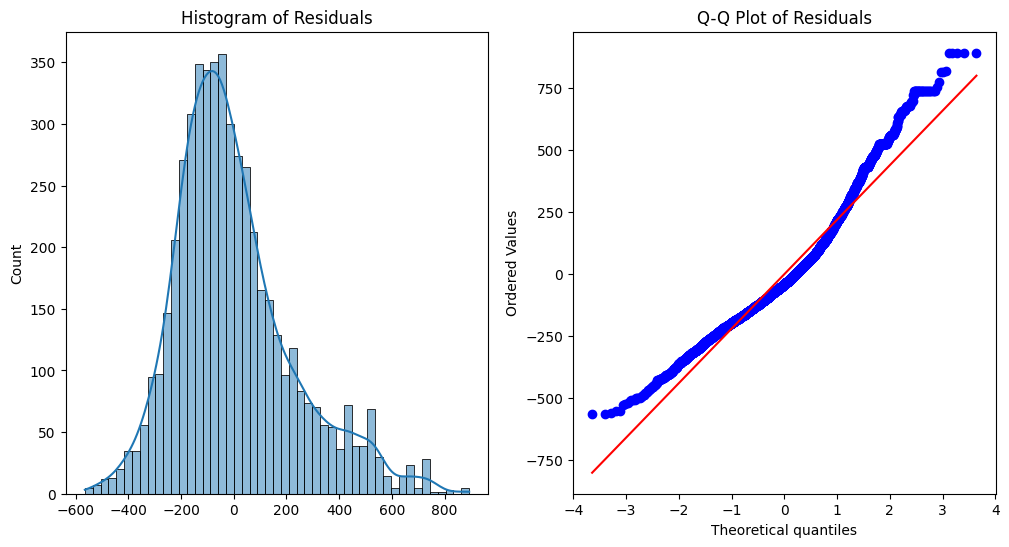

In [34]:
# Plotting histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

# Q-Q plot for residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

**Normal Distribution of Residuals:**The histogram and Q-Q plot of residuals indicates that the residuals are approximately normally distributed, which is a good sign for the normality assumption.

Text(0, 0.5, 'Residuals')

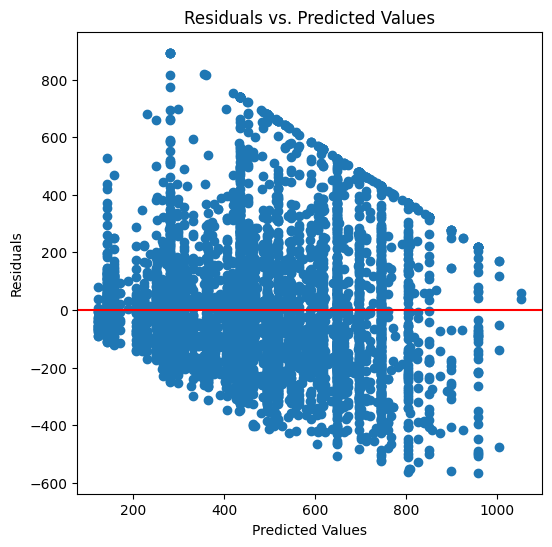

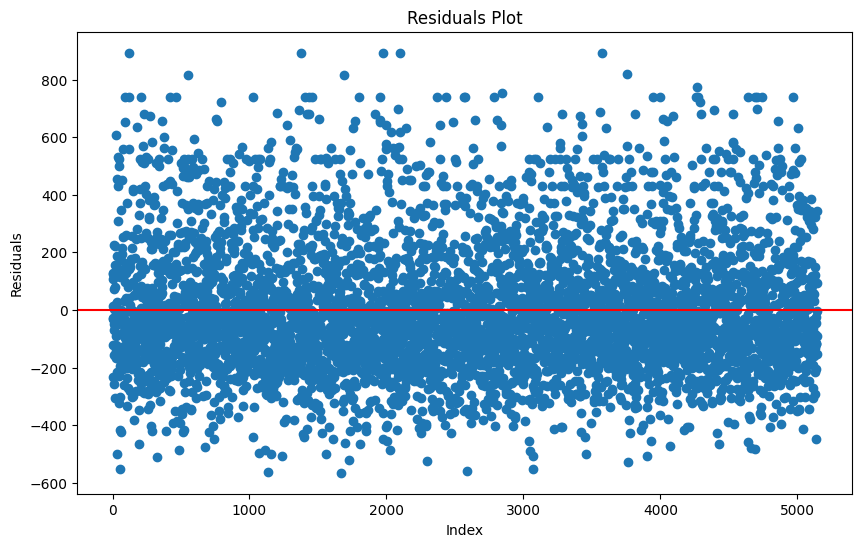

In [35]:
# Checking homoscedasticity
plt.figure(figsize=(6, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')

# Plotting residuals over the index
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, marker='o', linestyle='')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')

**Homoscedasticity:** The scatter plot of residuals vs. predicted values should ideally show a random pattern without any discernible shape. There seems to be a slight pattern, suggesting potential issues with homoscedasticity. However, the residual plots are scattered and confirm homoscedasticity.

**Independence Of Observation:** The Durbin-Watson statistic tests for autocorrelation in the residuals from a regression analysis. It ranges from 0 to 4, with a value around 2 indicating no autocorrelation. Values approaching 0 suggest positive autocorrelation and values toward 4 suggest negative autocorrelation. Our Durbin-Watson statistic is 2.017 indicating no autocorrelation.

# **Hypothesis Testing**

 The null hypothesis (no relationship between the variables) can be rejected for all the variables as they have significant p-values (<0.05). This confirms a statistically significant relationship between these socioeconomic factors (all selected variables) and household expenditure.